In [17]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers # type: ignore
from tensorflow.keras.preprocessing import image # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
import matplotlib.pyplot as plt

In [18]:
def demonstrate_basics():
    print("\n Basic TensorFlow Operations ")
    
    # Creating tensors
    tensor_0d = tf.constant(5) 
    tensor_1d = tf.constant([1, 2, 3, 4]) 
    tensor_2d = tf.constant([[1, 2, 3, 4], 
                             [5, 6, 7, 8]]) 
    tensor_3d = tf.constant([[[1, 2, 3, 4],
                              [5, 6, 7, 8]],

                             [[9, 10, 11, 12],
                              [13, 14, 15, 16]]])
    tensor_4d = tf.constant([
                            [[[1, 2, 3, 4], 
                               [5, 6, 7, 8]],                              
                             [[9, 10, 11, 12], 
                              [13, 14, 15, 16]],
                             [[17, 18, 19, 20], 
                              [21, 22, 23, 24]]],
                             
                            [[[25, 26, 27, 28],
                               [29, 30, 31, 32]],                              
                             [[33, 34, 35, 36],
                              [37, 38, 39, 40]],
                             [[41, 42, 43, 44],
                              [45, 46, 47, 48]]],
                            ])
    
    # operations on 4d tensor
    print("Type of every element:", tensor_4d.dtype)
    print("Number of axes:", tensor_4d.ndim)
    print("Shape of tensor:", tensor_4d.shape)
    print("Elements along axis 0 of tensor:", tensor_4d.shape[0])
    print("Elements along the last axis of tensor:", tensor_4d.shape[-1])
    print("Total number of elements (3*2*4*5): ", tf.size(tensor_4d).numpy())

    # Tensor values
    tf.print("0d:\n", tensor_0d)
    tf.print("1d:\n", tensor_1d)
    tf.print("2d:\n", tensor_2d)
    tf.print("3d:\n", tensor_3d)
    tf.print("4d:\n", tensor_4d)

    # Tensor shapes
    tf.print("Shape:", tensor_0d.shape)
    tf.print("Shape:", tensor_1d.shape)
    tf.print("Shape:", tensor_2d.shape)
    tf.print("Shape:", tensor_3d.shape)
    tf.print("Shape:", tensor_4d.shape)
    
    print("Convert to numpy array:", tensor_0d.numpy())
    print("Converting to python list:", tensor_3d.numpy().tolist())

    # Tensor ranks
    tf.print("Rank:", tf.rank(tensor_0d).numpy())
    tf.print("Rank:", tf.rank(tensor_1d).numpy())
    tf.print("Rank:", tf.rank(tensor_2d).numpy())
    tf.print("Rank:", tf.rank(tensor_3d).numpy())
    tf.print("Rank:", tf.rank(tensor_4d).numpy())
    
    # Tensor dimensions
    tf.print("Dimensions:", tf.shape(tensor_0d).numpy())
    tf.print("Dimensions:", tf.shape(tensor_1d).numpy())
    tf.print("Dimensions:", tf.shape(tensor_2d).numpy())
    tf.print("Dimensions:", tf.shape(tensor_3d).numpy())
    tf.print("Dimensions:", tf.shape(tensor_4d).numpy())

    # Tensor data types
    tf.print("Type:", tensor_0d.dtype)
    tf.print("Type:", tensor_1d.dtype)
    tf.print("Type:", tensor_2d.dtype)
    tf.print("Type:", tensor_3d.dtype)
    tf.print("Type:", tensor_4d.dtype)

    # Basic arithmetic operations
    tf.print("Addition:", tf.add(tensor_1d, tensor_1d))
    tf.print("Multiplication:", tf.multiply(tensor_2d, tensor_2d))
    tf.print("Matrix multiplication:", tensor_2d @ tf.transpose(tensor_2d))
    tf.print("Element-wise multiplication:", tensor_2d * tensor_2d)
    tf.print("Sum:", tf.reduce_sum(tensor_2d))
    tf.print("Mean:", tf.reduce_mean(tensor_2d))
    tf.print("Max:", tf.reduce_max(tensor_2d))
    tf.print("Min:", tf.reduce_min(tensor_2d))
    tf.print("Argmax:", tf.argmax(tensor_2d, axis=1))
    tf.print("Argmin:", tf.argmin(tensor_2d, axis=1))
    # tf.print("Standard deviation:", tf.math.reduce_std(tensor_2d))
    # tf.print("Variance:", tf.math.reduce_variance(tensor_2d))
    # tf.print("Square root:", tf.sqrt(tf.abs(tensor_2d)))
    # tf.print("Exponential:", tf.exp(tensor_1d))
    # tf.print("Logarithm:", tf.math.log(tf.abs(tensor_1d) + 1e-7))
    # tf.print("Floor:", tf.floor(tensor_1d))
    # tf.print("Ceiling:", tf.math.ceil(tensor_1d))
    # tf.print("Absolute value:", tf.abs(tensor_1d))
    # tf.print("Round:", tf.round(tensor_1d))
    # tf.print("Sign:", tf.sign(tensor_1d))
    # tf.print("Clip:", tf.clip_by_value(tensor_1d, 2, 3))
    # tf.print("Transpose:", tf.transpose(tensor_2d))
    tf.print("Reshape:", tf.reshape(tensor_2d, (4, 2)))
    tf.print("Expand dimensions:", tf.expand_dims(tensor_1d, axis=0))
    tf.print("Squeeze:", tf.squeeze(tf.expand_dims(tensor_1d, axis=0)))
    tf.print("Stack:", tf.stack([tensor_1d, tensor_1d], axis=0))
    tf.print("Unstack:", tf.unstack(tensor_2d, axis=0))
    tf.print("Split:", tf.split(tensor_2d, num_or_size_splits=2, axis=0))
    tf.print("Concat:", tf.concat([tensor_1d, tensor_1d], axis=0))
    tf.print("Gather:", tf.gather(tensor_2d, [0, 1], axis=0))
    tf.print("Scatter:", tf.tensor_scatter_nd_update(tensor_2d, [[0, 0], [1, 1]], [10, 20]))
    tf.print("Where:", tf.where(tensor_2d > 5, tensor_2d, -1))
    tf.print("Unique:", tf.unique(tf.constant([1, 2, 2, 3, 4, 4]))[0])
    tf.print("Sort:", tf.sort(tensor_1d))
    tf.print("Top K:", tf.math.top_k(tensor_1d, k=2).values)
    tf.print("Top K indices:", tf.math.top_k(tensor_1d, k=2).indices)
    
    # Reshaping tensors
    tensor_reshaped = tf.reshape(tensor_2d, (4, 2))
    tf.print("Reshaped Tensor:", tensor_reshaped)

    # Tensor slicing
    tensor_slice = tensor_3d[:, 1, :]
    tf.print("Sliced Tensor:", tensor_slice)

    # Tensor indexing
    tensor_indexed = tensor_4d[0, 1, 0, 1]
    print("Indexed Tensor:", tensor_indexed)
    
    # Tensor broadcasting
    tensor_broadcast = tf.constant([[1], [2], [3]]) + tf.constant([[1, 2, 3]])
    print("Broadcasted Tensor:", tensor_broadcast)
    print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))
    # Tensor concatenation
    tensor_concat = tf.concat([tensor_1d, tensor_1d], axis=0)
    print("Concatenated Tensor:", tensor_concat)
    
    # Tensor stacking
    tensor_stack = tf.stack([tensor_1d, tensor_1d], axis=0)
    print("Stacked Tensor:", tensor_stack)
    
    # Tensor splitting
    tensor_split = tf.split(tensor_2d, num_or_size_splits=2, axis=0)
    print("Split Tensor:", tensor_split)
    
    # Random tensors
    random_tensor = tf.random.uniform((2, 3), minval=0, maxval=10)
    print("Random Tensor:", random_tensor)
    
    # Ones and Zeros
    ones_tensor = tf.ones((2, 3))
    print("Ones Tensor:", ones_tensor)
    zeros_tensor = tf.zeros((2, 3))
    print("Zeros Tensor:", zeros_tensor)
    
    # Ragged tensors
    ragged_tensor = tf.ragged.constant([[1, 2], [3, 4, 5], [6]])
    print("Ragged Tensor:", ragged_tensor)
    
    # Sparse tensors
    sparse_tensor = tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])
    print("Sparse Tensor:", sparse_tensor)
    dense_tensor = tf.sparse.to_dense(sparse_tensor)
    print("Dense Tensor from Sparse:", dense_tensor)   
    
def create_neural_network():
    """Create a simple neural network using Sequential API"""
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(784,)),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [19]:
def create_cnn():
    """Create a Convolutional Neural Network"""
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [20]:
def demonstrate_mnist():
    """Demonstrate training on MNIST dataset"""
    print("\n MNIST Classification Example ")
    
    # Load and preprocess MNIST data
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
    x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
    
    # Create and compile model
    model = create_cnn()
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    # Train model
    history = model.fit(x_train, y_train, epochs=5, 
                       validation_data=(x_test, y_test))
    
    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"\nTest accuracy: {test_acc:.4f}")
    
    return history


In [21]:
def demonstrate_transfer_learning():
    """Demonstrate transfer learning with VGG16"""
    print("\n Transfer Learning Example ")
    
    # Load VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False,
                      input_shape=(224, 224, 3))
    
    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom layers
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(2, activation='softmax')
    ])
    
    print(model.summary())

In [22]:
def demonstrate_custom_training():
    """Demonstrate custom training loop"""
    print("\n Custom Training Loop Example ")
    
    # Create synthetic data
    x = np.random.random((1000, 20))
    y = np.random.random((1000, 1))
    
    # Create model
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(20,)),
        layers.Dense(1)
    ])
    
    # Custom training loop
    optimizer = tf.keras.optimizers.Adam()
    loss_fn = tf.keras.losses.MeanSquaredError()
    
    @tf.function
    def train_step(x, y):
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_fn(y, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        return loss
    
    for epoch in range(5):
        loss = train_step(x, y)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

In [23]:
def demonstrate_data_pipeline():
    """Demonstrate TensorFlow data pipeline"""
    print("\n Data Pipeline Example ")
    
    # Create dataset from tensor
    dataset = tf.data.Dataset.from_tensor_slices(np.arange(10))
    
    # Apply transformations
    dataset = dataset.map(lambda x: x * 2)
    dataset = dataset.batch(3)
    dataset = dataset.shuffle(buffer_size=10)
    
    # Iterate over dataset
    for batch in dataset:
        print("Batch:", batch)

In [24]:
def plot_training_history(history):
    """Plot training history"""
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


TensorFlow Demonstration Program
TensorFlow version: 2.19.0

Running basic TensorFlow operations...

 Basic TensorFlow Operations 
Type of every element: <dtype: 'int32'>
Number of axes: 4
Shape of tensor: (2, 3, 2, 4)
Elements along axis 0 of tensor: 2
Elements along the last axis of tensor: 4
Total number of elements (3*2*4*5):  48
0d:
 5
1d:
 [1 2 3 4]
2d:
 [[1 2 3 4]
 [5 6 7 8]]
3d:
 [[[1 2 3 4]
  [5 6 7 8]]

 [[9 10 11 12]
  [13 14 15 16]]]
4d:
 [[[[1 2 3 4]
   [5 6 7 8]]

  [[9 10 11 12]
   [13 14 15 16]]

  [[17 18 19 20]
   [21 22 23 24]]]


 [[[25 26 27 28]
   [29 30 31 32]]

  [[33 34 35 36]
   [37 38 39 40]]

  [[41 42 43 44]
   [45 46 47 48]]]]
Shape: TensorShape([])
Shape: TensorShape([4])
Shape: TensorShape([2, 4])
Shape: TensorShape([2, 2, 4])
Shape: TensorShape([2, 3, 2, 4])
Convert to numpy array: 5
Converting to python list: [[[1, 2, 3, 4], [5, 6, 7, 8]], [[9, 10, 11, 12], [13, 14, 15, 16]]]
Rank: 0
Rank: 1
Rank: 2
Rank: 3
Rank: 4
Dimensions: array([], dtype=int32)
Di

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None

Running custom training loop example...

 Custom Training Loop Example 
Epoch 1, Loss: 0.2338
Epoch 2, Loss: 0.1960
Epoch 3, Loss: 0.1662
Epoch 4, Loss: 0.1443
Epoch 5, Loss: 0.1301

Running data pipeline example...

 Data Pipeline Example 
Batch: tf.Tensor([ 6  8 10], shape=(3,), dtype=int32)
Batch: tf.Tensor([18], shape=(1,), dtype=int32)
Batch: tf.Tensor([12 14 16], shape=(3,), dtype=int32)
Batch: tf.Tensor([0 2 4], shape=(3,), dtype=int32)

Plotting training history...


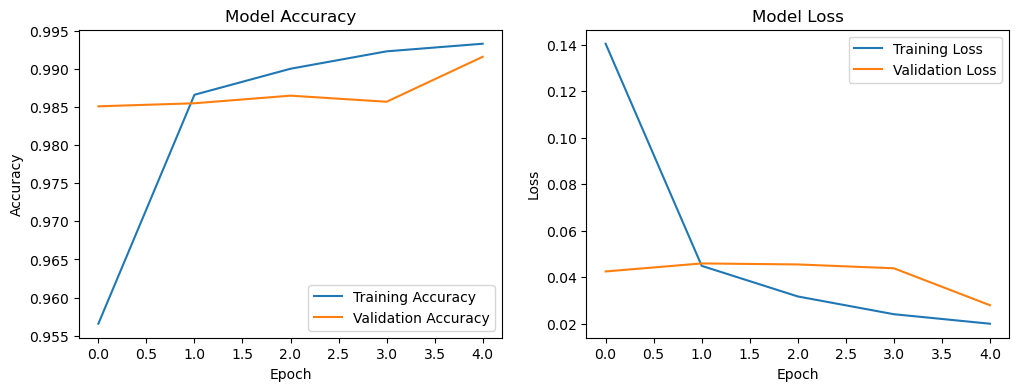

In [25]:
def main():
    """Main function to run all demonstrations"""
    print("TensorFlow Demonstration Program")
    print("TensorFlow version:", tf.__version__)
    
    try:
        # Run demonstrations
        print("\nRunning basic TensorFlow operations...")
        demonstrate_basics()
        
        print("\nRunning MNIST classification example...")
        history = demonstrate_mnist()
        
        print("\nRunning transfer learning example...")
        demonstrate_transfer_learning()
        
        print("\nRunning custom training loop example...")
        demonstrate_custom_training()
        
        print("\nRunning data pipeline example...")
        demonstrate_data_pipeline()
        
        # Plot training results
        print("\nPlotting training history...")
        plot_training_history(history)
        
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()